# Import essential library

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Gathering

In [48]:
data = pd.read_csv("FuelConsumption.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


# Data Pre-Processing

In [49]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [50]:
data.corr()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [51]:
data.drop(columns=["MODELYEAR","MAKE","MODEL","VEHICLECLASS","TRANSMISSION","FUELCONSUMPTION_COMB_MPG"], inplace=True)
data.head()

,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,Z,9.9,6.7,8.5,196
1,2.4,4,Z,11.2,7.7,9.6,221
2,1.5,4,Z,6.0,5.8,5.9,136
3,3.5,6,Z,12.7,9.1,11.1,255
4,3.5,6,Z,12.1,8.7,10.6,244


In [52]:
data[["FUELTYPE"]].value_counts()

FUELTYPE
X           514
Z           434
E            92
D            27
dtype: int64

In [53]:
data[["FUELTYPE"]] = data[["FUELTYPE"]].replace({'X':1,'Z':2,'E':3,'D':4})

In [54]:
data.head()

,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,2,9.9,6.7,8.5,196
1,2.4,4,2,11.2,7.7,9.6,221
2,1.5,4,2,6.0,5.8,5.9,136
3,3.5,6,2,12.7,9.1,11.1,255
4,3.5,6,2,12.1,8.7,10.6,244


In [55]:
data.tail()

,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
1062,3.0,6,1,13.4,9.8,11.8,271
1063,3.2,6,1,13.2,9.5,11.5,264
1064,3.0,6,1,13.4,9.8,11.8,271
1065,3.2,6,1,12.9,9.3,11.3,260
1066,3.2,6,1,14.9,10.2,12.8,294


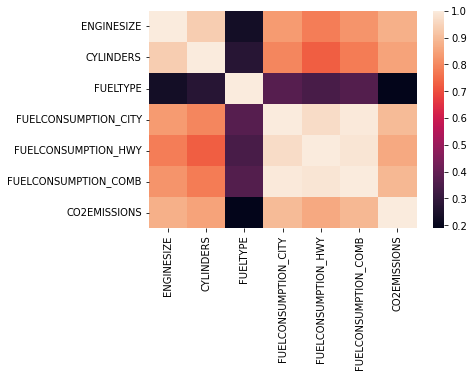

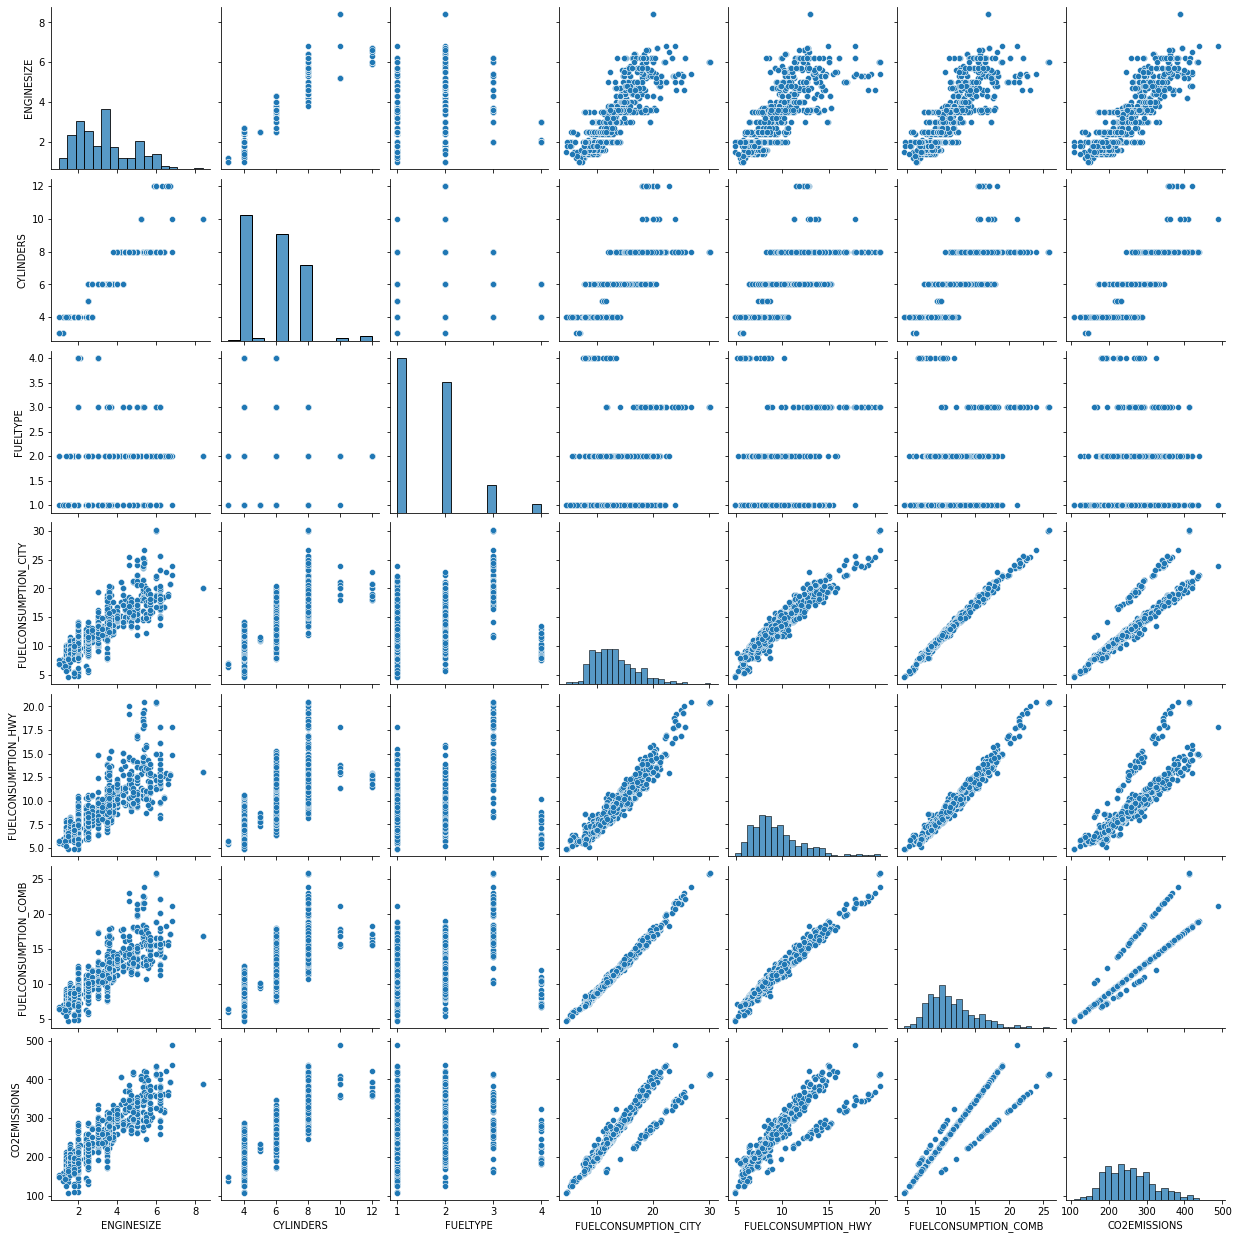

In [56]:
corr = data.corr()
sns.heatmap(corr)
sns.pairplot(data)

# Model Create

In [57]:
X = data[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY","FUELCONSUMPTION_COMB"]]
Y = data[["CO2EMISSIONS"]]

In [58]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

In [59]:
from sklearn import tree
dt_model = tree.DecisionTreeRegressor()
dt_model.fit(X, Y)

DecisionTreeRegressor()

In [60]:
dt_model.predict(Xtest)

array([356. , 209. , 230. , 212. , 168. , 292. , 212. , 276. , 202. ,
       334. , 313. , 437. , 224. , 281. , 177. , 260. , 414. , 223. ,
       251. , 359. , 191. , 189. , 244. , 242. , 131. , 283. , 274. ,
       294. , 246. , 110. , 359. , 239. , 229. , 237. , 191. , 196. ,
       294. , 221. , 237. , 237. , 184. , 184. , 202. , 194. , 297. ,
       198. , 260. , 179. , 344. , 359. , 338. , 288. , 290. , 129. ,
       230. , 179. , 283. , 159. , 258. , 209. , 207. , 205. , 225. ,
       294. , 262. , 299. , 354. , 230. , 207. , 124. , 304. , 189. ,
       354. , 270. , 338. , 216. , 283. , 179. , 235. , 166. , 186. ,
       253. , 161. , 334. , 407. , 246. , 191. , 172.5, 290. , 258. ,
       262. , 209. , 283. , 342. , 356. , 368. , 168. , 221. , 368. ,
       262. , 182. , 320. , 126. , 166. , 202. , 196. , 200. , 288. ,
       191. , 259. , 214. , 228. , 269. , 317. , 327. , 294. , 292. ,
       244. , 361. , 200. , 258. , 191. , 382. , 147. , 179. , 310. ,
       229. , 237. ,

# Prediction

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

yhat = dt_model.predict(Xtest)
print("MAE: ", 100 - mean_absolute_percentage_error(yhat, ytest) * 100)
print("MsE: ", mean_squared_error(yhat, ytest))
print("R2_Score: ", r2_score(yhat, ytest))

MAE:  99.99864553704457
MsE:  0.0011682242990654205
R2_Score:  0.9999997232429403


# Hyper Parameter

In [62]:
dt_model = tree.DecisionTreeRegressor(max_depth=3)
dt_model.fit(X, Y)

yhat = dt_model.predict(Xtest)
print("MAE: ", 100 - mean_absolute_percentage_error(yhat, ytest) * 100)
print("MsE: ", mean_squared_error(yhat, ytest))
print("R2_Score: ", r2_score(yhat, ytest))

MAE:  94.62511678467983
MsE:  382.6467410621905
R2_Score:  0.9047476652059809


In [64]:
dt_model = tree.DecisionTreeRegressor(max_depth=3, max_leaf_nodes=int(np.sqrt(np.array(850))))
dt_model.fit(X, Y)

yhat = dt_model.predict(Xtest)
print("MAE: ", 100 - mean_absolute_percentage_error(yhat, ytest) * 100)
print("MsE: ", mean_squared_error(yhat, ytest))
print("R2_Score: ", r2_score(yhat, ytest))

MAE:  94.62511678467983
MsE:  382.6467410621905
R2_Score:  0.9047476652059809


# Cross Validation

In [65]:
from sklearn.model_selection import cross_validate
cross_validate(dt_model, Xtrain, ytrain, cv=10)

{'fit_time': array([0.00500226, 0.00399709, 0.00299883, 0.00199485, 0.00300574,
        0.00199866, 0.00300407, 0.00400305, 0.00300074, 0.00300121]),
 'score_time': array([0.00300288, 0.00199962, 0.00199842, 0.00200009, 0.00199604,
        0.00200009, 0.00199652, 0.00199747, 0.00199986, 0.00200415]),
 'test_score': array([0.83603882, 0.87232227, 0.90852325, 0.85670551, 0.93113172,
        0.91724237, 0.93350145, 0.86485194, 0.85578213, 0.9302622 ])}